In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [5]:
from langchain_groq import ChatGroq

# Initialize Groq client (direct initialization)
llm = ChatGroq(model="llama3-70b-8192", temperature=0)

In [7]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
# graph_builder.add_node("chatbot", chatbot)

In [10]:
try:
    graph_builder.add_node("chatbot", chatbot)
except Exception as e:
    print(f"Error:- {e}")

Error:- Node `chatbot` already present.


In [11]:
graph_builder.add_edge(START, "chatbot")

In [12]:
graph_builder.add_edge("chatbot", END)

In [13]:
graph = graph_builder.compile()

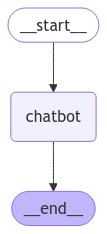

In [14]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [15]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?
Assistant: The stock market of India! It's a vibrant and dynamic market that has grown significantly over the years. Here's an overview:

**History**: The Indian stock market has a rich history dating back to 1875, when the Bombay Stock Exchange (BSE) was established. The National Stock Exchange of India (NSE) was set up in 1992, and it has since become one of the largest stock exchanges in the country.

**Stock Exchanges**: There are two main stock exchanges in India:

1. **Bombay Stock Exchange (BSE)**: Established in 1875, BSE is the oldest stock exchange in Asia and one of the largest in the world. It has over 5,000 listed companies.
2. **National Stock Exchange of India (NSE)**: Established in 1992, NSE is one of the largest stock exchanges in India, with over 1,900 listed companies.

**Indices**: The Indian stock market has several indices that track the performance of the 